<a href="http://study-ai.com/jdla/" target="_blank"><img src="http://ai999.careers/bnr_jdla.png" alt="[Study-AI]3ヵ月で現場で潰しが効く ディープラーニング講座" title="[Study-AI]3ヵ月で現場で潰しが効く ディープラーニング講座" /></a>

<p style="text-align: right;"><time datetime="2020-01-23">令和2年1月23日</time></p>
<p style="text-align: right;">北川一樹</p>

# レポート（深層学習・day2）

## Section1 : 勾配消失問題
- 出力層から入力層へ向かって勾配が緩やかになって行き、最終的に0になる
- 導関数の最大値が小さいシグモイド関数は勾配消失を起こし易い
    - シグモイド関数$\sigma(\cdot)$
    ```python
    # シグモイド関数（ロジスティック関数）
    def sigmoid(x):
        return 1/(1 + np.exp(-x))
    ```
$$
\sigma(u) = \frac{1}{1 + \exp(-u)}
$$
    - $\sigma(\cdot)$の導関数
    ```python
    # シグモイド関数（ロジスティック関数）の導関数
    def d_sigmoid(x):
        dx = (1.0 - sigmoid(x)) * sigmoid(x)
        return dx
    ```
$$
\sigma(u)' = (1-\sigma(u))\cdot\sigma(u)
$$
        - $u=0$のとき
$$
\begin{eqnarray}
\sigma(0)' &=& (1-\sigma(0))\cdot\sigma(0) \\
&=&(1-0.5)\cdot0.5 \\
&=&0.25
\end{eqnarray}
$$
        - 最大値は$0.25$
- 解決策
    - 活性化関数の選択
        - ReLU関数
        
        ```python
        # ReLU関数
        def relu(x):
            return np.maximum(0, x)
        ```
        
        $$
        f(x)=
        \begin{cases}
        x & (x > 0) \\
        0 & (x \leq 0)
        \end{cases}
        $$
        
            - 勾配消失問題とスパース化問題を回避
    - 重みの初期設定
        - ゼロ
            - 全ての値が同じ値で伝わる為、パラメータのチューニングが行われなくなる
        - Xavier（ザビエル）
        
        ```python
        # Xavierの初期値
        network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size)
        network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size)
        ```
        
        - He
        ```python
        # Heの初期値
        network['W1'] = np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2)
        network['W2'] = np.random.randn(hidden_layer_size, output_layer_size) / np.sqrt(hidden_layer_size) * np.sqrt(2)
        ```
        
            - ReLU関数と付随
    - バッチ正規化
        - ミニバッチ単位で、入力値のデータの偏りを抑制する手法
        - 総入力$\mathbf{u}$又は中間層出力$\mathbf{z}$で行われる
        - 一時的な効果
            - 計算の高速化
            - 勾配消失が起きづらくなる

### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|

## Section2 : 学習率最適化手法
- 決め方
    - 大きめの値から徐々に小さくして行く
- パラメータ更新
    - 通常の手法
        - 勾配降下法
            - 誤差をパラメータで微分したものと学習率の積を減算する
    - 学習率最適化手法
        - モメンタム
        ```python
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]
        ```
            - 誤差のパラメータで微分したものと学習率の積を計算した後、現在の重みに前回の重みを減算した値と慣性の積を加算する
            - メリット
                - 局所的最適解にはならず、大域的最適解となる
                - **谷間に着いてから最も低い位置（最適値）に行く迄の時間が早い**
        - AdaGrad
        ```python
        # h[key]の中に0がないことが前提
        h[key] += np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]))
        ```
            - 誤差をパラメータで微分したものと再定義した学習率の積を減算する
            - メリット
                - **勾配のゆるやかな斜面に対して、最適値に近づける**
            - デメリット
                - 学習率を小さくして行くので鞍点問題を起こし易い
                    - 解決策としてRMSPropがある
        - RMSProp
        ```python
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)
        ```
            - 誤差をパラメータで微分したものと再定義した学習率の積を減算する**AdaGradの改良版**
            - メリット
                - 局所的最適解にはならず、大域的最適解となる
                - **ハイパーパラメータの調整が必要な場合が少ない**
        - Adam
            ```python
            m[key] += (1 - beta1) * (grad[key] - m[key])
            v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])
            network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7) 
            ```
            - モメンタムの、過去の勾配の指数関数的減衰平均
            - RMSPropの、過去の勾配の2乗の指数関数的減衰平均
            - モメンタムとRMSPropとの最適化アルゴリズム
            - メリット
                - **モメンタム及びRMSPropのメリットを孕んだ**アルゴリズム
                    - 故に最も多用される最適化手法

### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|

## Section3 : 過学習
# 過学習
- 原因
    - パラメータの数が多い
    - パラメータの値が適切ではない
        - 重みの値が大きい
    - ノード数が多い etc...
- 解決策
    - 正則化
        - ネットワークの自由度（層数、ノード数、パラメータの値）を制限すること
        - 手法
            - L1正則化$(P=1)$
                - Lasso
                - スパース化問題に対応
                - 符号関数を使う
                - `weight_decay_lambda`
                    - 値が小さ過ぎると過学習が起き易くなる
                    - 値が大き過ぎると学習が進まなくなる
            - L2正則化$(P=2)$
                - Ridge
                - ハイパーパラメータを大きな値にすると全ての重みが限りなく0に近付く
            - ドロップアウト
                - ランダムにノードを非活性にして学習
                - CNNでよく使われる
            - Weight Decay (荷重減衰)
                - 過学習が起きそうな重みの大きさ以下に抑え、かつ重みの大きさにばらつきを出す

### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|

## Section4 : 畳み込みニューラルネットワークの概念
- LeNet
- 入力層
    - 多次元データの平坦化（flatten）が不要
    - 画像
    - 音楽
- 畳み込み層
    - 構成
    1. 入力値
    1. フィルター
        - バイアス
        - パディング
        - ストライド
        - チャンネル
            - 奥行き数
            - フィルターはチャンネル数分用意
    1. 出力値
    1. バイアス
    1. 活性化関数
    1. 出力値
- プーリング層
   - 手法
       - マックスプーリング
       - アベレージプーリング
   - 特徴マップのサイズ（の公式）
       - ストライド$$\mathrm{S}$$
       - パディング$$\mathrm{P}$$
       - フィルターの高さ$$\mathrm{FH}$$
       - フィルターの幅$$\mathrm{FW}$$
       - 入力画像の高さ$$\mathrm{H}$$
       - 入力画像の幅$$\mathrm{W}$$
       - 特徴マップの高さ
$$
\mathrm{OH}=\frac{\mathrm{H}+2\mathrm{P}-\mathrm{FH}}{\mathrm{S}}+1
$$
       - 特徴マップの幅
$$
\mathrm{OW}=\frac{\mathrm{W}+2\mathrm{P}-\mathrm{FW}}{\mathrm{S}}+1
$$
- 全結合層
    - 一次元データを扱う

### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|明松真司, 田原眞一（杉山将監修）|徹底攻略 ディープラーニングG検定 ジェネラリスト問題集|インプレス|2019年|

## Section5 : 最新のCNN
- AlexNet
    - 画像認識コンペティションILSVRC2012で優勝したモデル
    - 5層の畳み込み層・プーリング層、3層の全結合層で構成
    - サイズ4096の全結合層にドロップアウトを使用

### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|

# レポート（深層学習・day3）

## Section1 : 再帰型ニューラルネットワークの概念
- RNNと略される
- **時系列データ**に対応可能なニューラルネットワーク
    - 時系列データとは、時間的順序を追って一定間隔毎に観察され、しかも相互に統計的依存関係が認められるようなデータの系列
    - 時間的順序を保持したデータの系列
        - Pythonのデータ構造でいえば、順序を保持した「リスト」、順序を保持しない「集合」の中では前者に近い
    - 例. 音声データ、テキストデータ
- 中間層が重要
    - 各時刻の状態を区別する為、初期の時刻を$0$、最新の時刻を$4$としたとき$$\mathrm{s}_{0},\mathrm{s}_{1},\mathrm{s}_{3}, \mathrm{s}_{4}$$と列挙できる
        - $\mathrm{s}_{0}$は初期の状態、$\mathrm{s}_{4}$は最新の状態を表わす
        - 任意の時刻$t$の状態は$$s_{t}$$と表わす
- RNNの全体像
$$
\begin{array}{rrrrr}
    \mathbf{x}_{4} & \underrightarrow{\hspace{16pt}\mathbf{W}_{\mathrm{(in)}}\hspace{16pt}} & \mathrm{s}_{4} & \underrightarrow{\hspace{14pt}\mathbf{W}_{\mathrm{(out)}}\hspace{14pt}} & \mathbf{y}_{4} \\
    && \mathbf{W}\uparrow && \\
    \mathbf{x}_{3} & \underrightarrow{\hspace{16pt}\mathbf{W}_{\mathrm{(in)}}\hspace{16pt}} & \mathrm{s}_{3} & \underrightarrow{\hspace{14pt}\mathbf{W}_{\mathrm{(out)}}\hspace{14pt}} & \mathbf{y}_{3} \\
    && \mathbf{W}\uparrow && \\
    \mathbf{x}_{2} & \underrightarrow{\hspace{16pt}\mathbf{W}_{\mathrm{(in)}}\hspace{16pt}} & \mathrm{s}_{2} & \underrightarrow{\hspace{14pt}\mathbf{W}_{\mathrm{(out)}}\hspace{14pt}} & \mathbf{y}_{2} \\
    && \mathbf{W}\uparrow && \\
    \mathbf{x}_{1} & \underrightarrow{\hspace{16pt}\mathbf{W}_{\mathrm{(in)}}\hspace{16pt}} & \mathrm{s}_{1} & \underrightarrow{\hspace{14pt}\mathbf{W}_{\mathrm{(out)}}\hspace{14pt}} & \mathbf{y}_{1} \\
    && \mathbf{W}\uparrow && \\
    && \mathrm{s}_{0} && \\
    && \text{unfold}\,\Uparrow && \\
    \mathbf{x}_{\,} & \underrightarrow{\hspace1in} & \mathrm{s}_{\,} & \underleftarrow{\hspace1in} & \mathbf{y}_{\,} \\
    && \circlearrowright &&
\end{array}
$$

- 数式
$$
\begin{eqnarray}
    \mathbf{u}^{t}&=&\mathrm{W}_{\mathrm{(in)}}\mathbf{x}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b} \\
    \mathbf{z}^{t}&=&f\left(\mathrm{W}_{\mathrm{(in)}}\mathbf{x}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b}\right) \\
    \mathbf{v}^{t}&=&\mathrm{W}_{\mathrm{(out)}}\mathbf{z}^{t}+\mathbf{c} \\
    \mathbf{y}^{t}&=&g\left(\mathrm{W}_{\mathrm{(out)}}\mathbf{z}^{t}+\mathbf{c}\right)
\end{eqnarray}
$$

- 当該コード（配布ファイル「3_1_simple_RNN.ipynb」80～83行目、バイアス$\mathbf{b}$等は省略）

```python
u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
z[:,t+1] = functions.sigmoid(u[:,t+1])

y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
```

- RNNの特徴
    - 時系列モデルを扱うには、初期の状態$\mathrm{s}_{0}$と、過去の時間の状態$\mathrm{s}_{t-1}$を保持し、そこから次の時間での$t$を再帰的に求める再帰構造が必要になる

- BPTT（通時的誤差逆伝播法）
    - RNNで用いられる誤差逆伝播法の一種
    - BPTTの数学的記述1
    $$
    \begin{eqnarray}
        \frac{\partial E}{\partial \mathbf{W}_{\mathrm{(in)}}}&=&\frac{\partial E}{\partial \mathbf{u}^{t}}\left[\frac{\partial \mathbf{u}^{t}}{\partial \mathbf{W}_{\mathrm{(in)}}}\right]^{\mathrm{T}}&=&\delta^{t} \left[\mathbf{x}^{t}\right]^{\mathrm{T}} \tag{1} \\
        \frac{\partial E}{\partial \mathbf{W}_{\mathrm{(out)}}}&=&\frac{\partial E}{\partial \mathbf{v}^{t}}\left[\frac{\partial \mathbf{v}^{t}}{\partial \mathbf{W}_{\mathrm{(out)}}}\right]^{\mathrm{T}}&=&\delta^{\mathrm{out},t} \left[\mathbf{z}^{t}\right]^{\mathrm{T}} \tag{2} \\
        \frac{\partial E}{\partial \mathbf{W}}&=&\frac{\partial E}{\partial \mathbf{u}^{t}}\left[\frac{\partial \mathbf{u}^{t-1}}{\partial \mathbf{W}}\right]^{\mathrm{T}}&=&\delta^{t} \left[\mathbf{z}^{t-1}\right]^{\mathrm{T}} \tag{3} \\
        \frac{\partial E}{\partial \mathbf{b}}&=&\frac{\partial E}{\partial \mathbf{u}^{t}}\cdot \frac{\partial \mathbf{u}^{t}}{\partial \mathbf{b}}&=&\delta^{t} \tag{4} \\
        \frac{\partial E}{\partial \mathbf{c}}&=&\frac{\partial E}{\partial \mathbf{u}^{t}}\cdot \frac{\partial \mathbf{u}^{t}}{\partial \mathbf{c}}&=&\delta^{\mathrm{out},t} \tag{5}
    \end{eqnarray}
    $$
        1. 誤差を、入力から現在の中間層を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(in)}}$で微分
        
        ```python
        np.dot(X.T, delta[:,t].reshape(1,-1))
        ```
        
        1. 誤差を、中間層から出力を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(out)}}$で微分
        
        ```python
        np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        ```
        
        1. 誤差を、中間層から次の中間層に渡されるときの重み$\mathrm{W}$で微分
        
        ```python
        np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        ```
        
        1. 誤差を、バイアス$\mathrm{b}$で微分
        1. 誤差を、もう1つのバイアス$\mathrm{c}$で微分
    - BPTTの数学的記述2
    $$
    \begin{eqnarray}
        \mathbf{u}^{t}&=&\mathbf{W}_{\mathrm{(in)}}\mathbf{x}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b} \tag{1} \\
        \mathbf{z}^{t}&=&f\left(\mathbf{W}_{\mathrm{(in)}}\mathbf{x}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b}\right) \tag{2} \\
        \mathbf{v}^{t}&=&\mathbf{W}_{\mathrm{(out)}}\mathbf{z}^{t}+\mathbf{c} \tag{3} \\
        \mathbf{y}^{t}&=&g\left(\mathbf{W}_{\mathrm{(out)}}\mathbf{z}^{t}+\mathbf{c}\right) \tag{4}
    \end{eqnarray}
    $$
        1. 総入力$\mathbf{u}^{t}$: 入力から現在の中間層を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(in)}}$と入力$\mathbf{x}^{t}$との内積をとったものと、中間層から次の中間層に渡されるときの重み$\mathrm{W}$と過去の中間層出力$\mathbf{z}^{t-1}$との内積をとったもの（と、バイアス$\mathbf{b}$）とを足し合わせる
        ```python
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        ```
        
        1. 中間層出力$\mathbf{z}^{t}$: 総入力$\mathbf{u}^{t}$に、中間層の活性化関数$f(\cdot)$を作用させる
        
        ```python
        z[:,t+1] = functions.sigmoid(u[:,t+1])
        ```
        
        1. 総入力$\mathbf{v}^{t}$: 中間層から出力を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(out)}}$と中間層出力$\mathbf{z}^{t}$との内積をとったもの（と、バイアス$\mathbf{c}$）とを足し合わせる
        
        ```python
        np.dot(z[:,t+1].reshape(1, -1), W_out)
        ```
        
        1. 出力$\mathbf{y}^{t}$: 総入力$\mathbf{v}^{t}$に、出力層の活性化関数$g(\cdot)$を作用させる
        
        ```python
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))
        ```
        
    - BPTTの数学的記述3
    $$
    \begin{eqnarray}
        \frac{\partial E}{\partial \mathbf{u}^{t}}=\frac{\partial E}{\partial \mathbf{v}^{t}}\cdot \frac{\partial \mathbf{v}^{t}}{\partial \mathbf{u}^{t}}=\frac{\partial E}{\partial \mathbf{v}^{t}}\cdot \frac{\partial \left\{\mathbf{W}_{\mathrm{(out)}}f\left(\mathbf{u}^{t}\right)+c\right\}}{\partial \mathbf{u}^{t}}=f^{t}\left(u^{t}\right)\mathbf{W}_{\mathrm{(out)}}^{\mathrm{T}}\delta^{\mathrm{out},t}&=&\delta^{t} \tag{1} \\
        \delta^{t-1}=\frac{\partial E}{\partial \mathbf{u}^{t-1}}=\frac{\partial E}{\partial \mathbf{u}^{t}}\frac{\partial \mathbf{u}^{t}}{\partial \mathbf{u}^{t-1}}=\delta^{t}\left\{\frac{\partial \mathbf{u}^{t}}{\partial \mathbf{z}^{t-1}}\frac{\partial \mathbf{z}^{t-1}}{\partial \mathbf{u}^{t-1}}\right\}&=&\delta^{t}\left\{\mathbf{W}f^{t}\left(\mathbf{u}^{t-1}\right)\right\} \tag{2} \\
        \delta^{t-z-1}&=&\delta^{t-z}\left\{\mathbf{W}f^{t}\left(\mathbf{u}^{t-z-1}\right)\right\} \tag{3}
    \end{eqnarray}
    $$
        1. 
        
        ```python
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        ```
        
    - BPTTの数学的記述4（パラメータ$\mathbf{W}_{\mathrm{(in)}},\mathbf{W},\mathbf{W}_{\mathrm{(out)}},\mathbf{b},\mathbf{c}$の勾配適用による更新式）
    $$
    \begin{eqnarray}
        \mathbf{W}_{\mathrm{(in)}}^{t+1}&=&\mathbf{W}_{\mathrm{(in)}}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{W}_{\mathrm{(in)}}}=\mathbf{W}_{\mathrm{(in)}}^{t}-\epsilon \sum_{z=0}^{T_{t}}\delta^{t-z} \left[\mathbf{x}^{t-z}\right]^{\mathrm{T}} \tag{1} \\
        \mathbf{W}_{\mathrm{(out)}}^{t+1}&=&\mathbf{W}_{\mathrm{(out)}}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{W}_{\mathrm{(out)}}}=\mathbf{W}_{\mathrm{(out)}}^{t}-\epsilon \delta^{\mathrm{out},t} \left[\mathbf{z}^{t}\right]^{\mathrm{T}} \tag{2} \\
         \mathbf{W}^{t+1}&=&\mathbf{W}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{W}}=\mathbf{W}_{\mathrm{(in)}}^{t}-\epsilon \sum_{z=0}^{T_{t}}\delta^{t-z} \left[\mathbf{z}^{t-z-1}\right]^{\mathrm{T}} \tag{3} \\
         \mathbf{b}^{t+1}&=&\mathbf{b}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{b}}=\mathbf{b}^{t}-\epsilon \sum_{z=0}^{T_{t}}\delta^{t-z} \tag{4} \\
         \mathbf{c}^{t+1}&=&\mathbf{c}^{t}-\epsilon \frac{\partial E}{\partial \mathbf{c}}=\mathbf{c}^{t}-\epsilon \delta^{\mathrm{out},t} \tag{5}
    \end{eqnarray}
    $$
        
        1. 
        
        ```python
        W_in -= learning_rate * W_in_grad
        ```
        
        1. 
        
        ```python
        W_out -= learning_rate * W_out_grad
        ```
        
        1. 
        
        ```python
        W -= learning_rate * W_grad
        ```
        
    - BPTTの全体像（式展開）
    $$
    \begin{eqnarray}
        E^{t}&=&loss\left(\mathbf{y}^{t},\mathbf{d}^{t}\right) \\
        &=&loss\left(g\left(\mathbf{W}_{\mathrm{(out)}}z^{t}+\mathbf{c}\right),\mathbf{d}^{t}\right) \\
        &=&loss\left(g\left(\mathbf{W}_{\mathrm{(out)}}
        f\underline{\left(\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b}\right)}
        +\mathbf{c}\right),\mathbf{d}^{t}\right)
    \end{eqnarray}
    $$
        - 下線部の$1$時刻前の中間層出力$\mathbf{z}^{t-1}$を展開すると
        $$\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t}+\mathbf{W}\mathbf{z}^{t-1}+\mathbf{b}$$
        $$\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t}+\mathbf{W}f(\mathbf{u}^{t-1})+\mathbf{b}$$
        $$\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t}+\mathbf{W}f\left(\mathbf{W}_{\mathrm{(in)}}\mathbf{x}_{}^{t-1}+\mathbf{W}\mathbf{z}^{t-2}+\mathbf{b}\right)+\mathbf{b}$$
        $2$時刻前の中間層出力$\mathbf{z}^{t-2}$に遡れる
    
    

### 実装演習結果
- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その1

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|一様乱数|

<img src="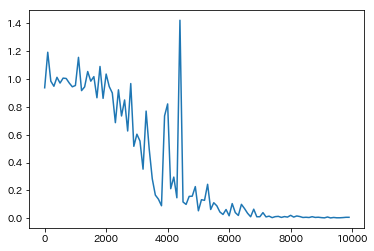
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その2

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|ReLU関数|
|重み初期値|一様乱数|

<img src="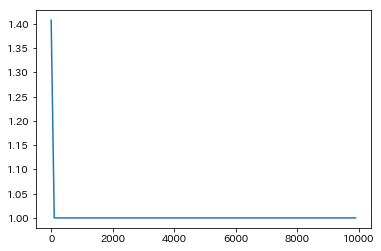
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その3

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$0.1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|一様乱数|

<img src="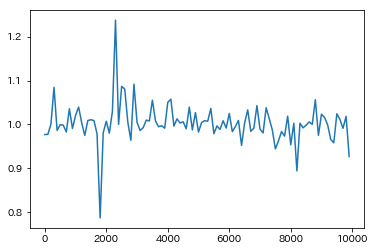
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その4

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.01$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|一様乱数|

<img src="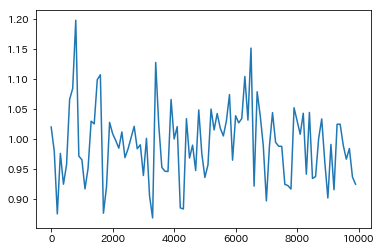
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その5

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$4$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|一様乱数|

<img src="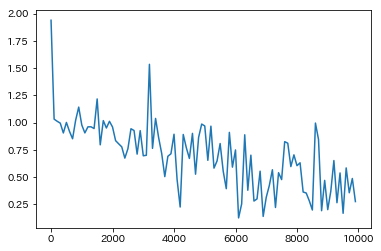
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その6

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|Xavier|

```python
# Xavier
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size))
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size))
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size))
```

<img src="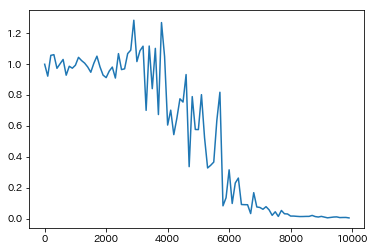
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その7

|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|シグモイド関数|
|重み初期値|He|

```python
# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
```

<img src="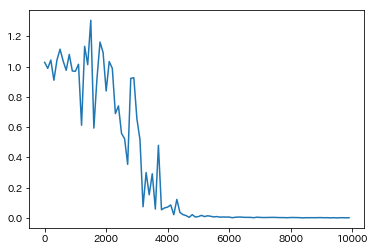
">

- 配布ファイル「3_1_simple_RNN.ipynb」実行結果その8
    
|ハイパーパラメータ|値|
|:--|--:|
|重みの標準偏差|$1$|
|学習率|$0.1$|
|中間層ノード数|$16$|
|中間層の活性化関数|ハイパボリックタンジェント|
|重み初期値|He|

```python
# ハイパボリックタンジェントの導関数
def d_tanh(x):
    return 1/(np.cosh(x) ** 2)
```

<img src="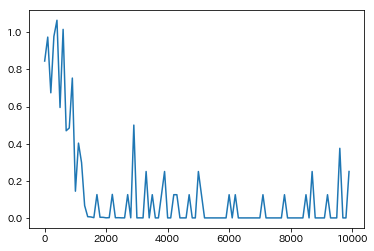
">

### 確認テスト考察
- 問1. サイズ$5 \times 5$の入力画像を、サイズ$3 \times 3$のフィルターで畳み込んだ時の出力画像のサイズを答えよ。なおストライドは$2$、パディングは$1$とする。
- 答1.
$$
\begin{eqnarray}
    \mathrm{P}&=&1 \\
    \mathrm{S}&=&2 \\
    \mathrm{W}&=&\mathrm{H}&=&5 \\
    \mathrm{FW}&=&\mathrm{FH}&=&3 \\
    \mathrm{OW}&=&\mathrm{OH}&=&\frac{\mathrm{H}+2\mathrm{P}-\mathrm{FH}}{\mathrm{S}}+1 \\
    &&&=&\frac{5+2\cdot 1-3}{2}+1 \\
    &&&=&3
\end{eqnarray}
$$

- 問2. RNNネットワークには大きくわけて3つの重みがある。1つは入力から現在の中間層を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(in)}}$、1つは中間層から出力を定義する際にかけられる重み$\mathrm{W}_{\mathrm{(out)}}$である。残り1つの重み$\mathrm{W}$について説明せよ。
- 答2. $\mathrm{W}$は中間層から次の中間層に渡されるときの重みである。

- 問3. 連鎖律の原理を使い、$\frac{\mathrm{d}z}{\mathrm{d}x}$を求めよ。
- 答3.
$$
\begin{eqnarray}
    z&=&t^{2} \\
    \frac{\mathrm{d}z}{\mathrm{d}t}&=&2t \\
    t&=&x+y \\
    \frac{\mathrm{d}t}{\mathrm{d}x}&=&1 \\
    \frac{\mathrm{d}z}{\mathrm{d}x}&=&\frac{\mathrm{d}z}{\mathrm{d}t}\cdot \frac{\mathrm{d}t}{\mathrm{d}x} \\
    &=&2t\cdot 1 \\
    &=&2t \\
    &=&2(x+y)
\end{eqnarray}
$$

- 問4. $\mathbf{y}_1$を$\mathbf{x},\mathrm{s}_{0},\mathrm{s}_{1},\mathbf{W}_{\mathrm{(in)}},\mathbf{W},\mathbf{W}_{\mathrm{(out)}}$等を用いて数式で表わせ。※また中間層の出力にシグモイド関数$\sigma (\cdot)$を作用させよ。
- 答4.
$$
\begin{eqnarray}
    \mathbf{z}_{1}&=&\sigma \left(\mathrm{s}_{0}\mathbf{W}+\mathbf{x}_{1}\mathbf{W}_{\mathrm{(in)}}+\mathbf{b}\right) \\
    \mathbf{y}_{1}&=&\sigma \left(\mathbf{z}_{1}\mathbf{W}_{\mathrm{(out)}}+\mathbf{c}\right)
\end{eqnarray}
$$

### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section2 : LSTM
### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section3 : GRU
### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section4 : 双方向RNN
### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section5 : Seq2Seq
### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section6 : Word2vec
### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

## Section7 : Attention Mechanism
### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|

# レポート（深層学習・day4）

## Section1 : Tensorflowの実装演習
### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|
|Antonio Gulli, Sujit Pal（大串正矢訳） |直感 Deep Learning ―Python×Kerasでアイデアを形にするレシピ|オライリー・ジャパン|2018年|

## Section2 : 強化学習
### 実装演習結果
### 確認テスト考察
### 参考図書
|著者名|書籍名|出版社|発行年|
|:--|:--|:--|--:|
|Guido van Rossum（鴨澤眞夫訳）|Pythonチュートリアル 第3版|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ―Pythonで学ぶディープラーニングの理論と実装|オライリー・ジャパン|2016年|
|斎藤康毅|ゼロから作るDeep Learning ❷ ―自然言語処理編|オライリー・ジャパン|2018年|
|Antonio Gulli, Sujit Pal（大串正矢訳） |直感 Deep Learning ―Python×Kerasでアイデアを形にするレシピ|オライリー・ジャパン|2018年|